0.611875050850071

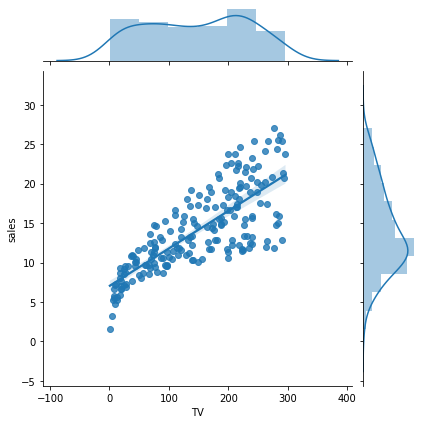

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 12 18:57:32 2020

@author: Onur
"""

import pandas as pd
import seaborn as sns  #model görselleştirme apabilmek için yükledik
from sklearn.linear_model import LinearRegression  #modelimizi kurmak için kullanıyoruz
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_Machinelearning\Advertising.csv")
df=df.iloc[:,1:len(df)]

sns.jointplot(x="TV",y="sales",data=df,kind="reg")

x=df[["TV"]]   #daha rahat işlem yapabilmek için kullandık
y=df[["sales"]]

reg=LinearRegression()  #model nesnesi oluşturuyoruz

model=reg.fit(x,y)   #modeli fit etmek kurmak anlamına geliyor
dir(model)   #nesnenin içinden alabileceğimiz bilgileri getiriyor

model.intercept_   #b0 sbt sayısını buluyoruz
model.coef_       #b1 yani eğimi buluyoruz

#rkare = bağımsız değişkenlerin bağımlı değişkeni açıklama gücü
model.score(x,y)   #satışlardaki değişiklik yüzde 60 olarak bağımsız değişkene bağlı


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

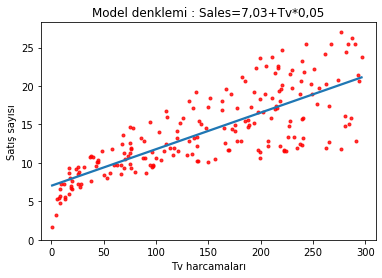

In [7]:
#%%

g=sns.regplot(df["TV"],df["sales"], ci=None, scatter_kws={'color':'red','s':9})  #ci etrfına güven aralığı koyma demek
g.set_title("Model denklemi : Sales=7,03+Tv*0,05")
g.set_ylabel("Satış sayısı")
g.set_xlabel("Tv harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0)   #y ekseninin başlangıç noktası

model.predict([[165]])  #predict ediyoruz tahmin ediyoruz

yeni_veri=[[5],[15],[30]]
model.predict(yeni_veri)


In [8]:
#%%
#Artıklar Ve Makine öğrenmesindeki önemi
#mse = hata kareler ortalaması
#rmse = hata kareler ortalamasının karekökü

gercek_y=y[0:10]
tahmin_edilen_y=pd.DataFrame(model.predict(x)[0:10])  #ilk 10 veri için hatayı hesaplıyoruz

hatalar=pd.concat([gercek_y, tahmin_edilen_y], axis=1)  #birleştirme işlemi yapıyoruz
hatalar.columns=["gercek_y","Tahmin_edilen_y"]

hatalar["hata"]=hatalar["gercek_y"]-hatalar["Tahmin_edilen_y"]
hatalar["hatakaresi"]=hatalar["hata"]**2

np.mean(hatalar["hatakaresi"]) #hatalar karesinin ortalamasını hesaplamış old

9.290350329638104